In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
# define fuzzy variables
around_sound = ctrl.Antecedent(np.arange(0, 141, 1), 'around_sound')
Expected_sound = ctrl.Antecedent(np.arange(0, 101, 1), 'Expected_sound')
Headphone_Valume = ctrl.Consequent(np.arange(0, 101, 1), 'Headphone_Valume')

In [3]:
# add fuzzy membership function
around_sound['low'] = fuzz.trimf(around_sound.universe, [0, 0, 70])
around_sound['mid'] = fuzz.trimf(around_sound.universe, [50, 70, 90])
around_sound['high'] = fuzz.trimf(around_sound.universe, [70, 140, 140])

Expected_sound['low'] = fuzz.trimf(Expected_sound.universe, [0, 0, 60])
Expected_sound['mid'] = fuzz.trimf(Expected_sound.universe, [30, 50, 70])
Expected_sound['high'] = fuzz.trimf(Expected_sound.universe, [40, 100, 100])

Headphone_Valume['low'] = fuzz.trimf(Headphone_Valume.universe, [0, 0, 70])
Headphone_Valume['mid'] = fuzz.trimf(Headphone_Valume.universe, [30, 50, 70])
Headphone_Valume['high'] = fuzz.trimf(Headphone_Valume.universe, [30, 100, 100])


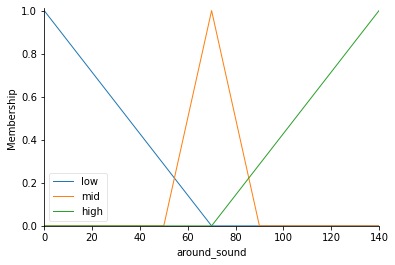

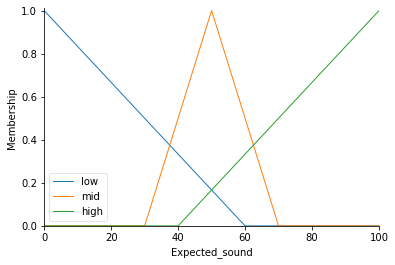

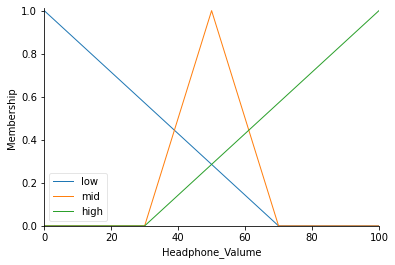

In [4]:
around_sound.view()
Expected_sound.view()
Headphone_Valume.view()
plt.show()

In [5]:
# fuzzy rules
rule1 = ctrl.Rule(around_sound['low'] & Expected_sound['low'], Headphone_Valume['low'])
rule2 = ctrl.Rule(around_sound['low'] & Expected_sound['mid'], Headphone_Valume['low'])
rule3 = ctrl.Rule(around_sound['low'] & Expected_sound['high'], Headphone_Valume['mid'])
rule4 = ctrl.Rule(around_sound['mid'] & Expected_sound['low'], Headphone_Valume['low'])
rule5 = ctrl.Rule(around_sound['mid'] & Expected_sound['mid'], Headphone_Valume['mid'])
rule6 = ctrl.Rule(around_sound['mid'] & Expected_sound['high'], Headphone_Valume['high'])
rule7 = ctrl.Rule(around_sound['high'] & Expected_sound['low'], Headphone_Valume['mid'])
rule8 = ctrl.Rule(around_sound['high'] & Expected_sound['mid'], Headphone_Valume['high'])
rule9 = ctrl.Rule(around_sound['high'] & Expected_sound['high'], Headphone_Valume['high'])

In [6]:
# add rules to conctrol system
Headphone_Valume_rule = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

Headphone_Valume_output = ctrl.ControlSystemSimulation(Headphone_Valume_rule)

In [7]:
def simulate(around_sound, Expected_sound):
    Headphone_Valume_output.input['around_sound'] = around_sound
    Headphone_Valume_output.input['Expected_sound'] = Expected_sound
    Headphone_Valume_output.compute()
    print(
        f'input : around_sound = {around_sound} db,Expected_sound = {Expected_sound} %')
    print(
        f'output : Headphone_Valume_output = {Headphone_Valume_output.output["Headphone_Valume"]} %')
    Headphone_Valume.view(sim = Headphone_Valume_output)
    plt.show()


input : around_sound = 80 db,Expected_sound = 2 %
output : Headphone_Valume_output = 27.95610331835309 %


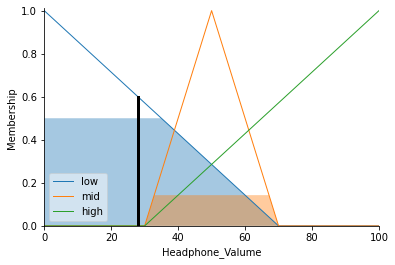

In [8]:
# simulation 1
simulate(around_sound=20, Expected_sound=2)

input : around_sound = 15 db,Expected_sound = 50 %
output : Headphone_Valume_output = 25.048120899815828 %


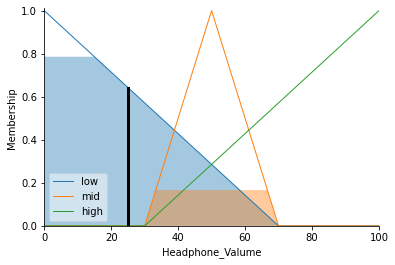

In [9]:
# simulation 2
simulate(around_sound=15, Expected_sound=50)

input : around_sound = 10 db,Expected_sound = 90 %
output : Headphone_Valume_output = 49.99999999999999 %


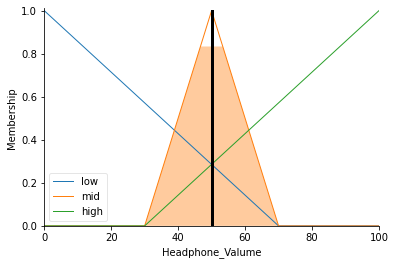

In [10]:
# simulation 3
simulate(around_sound=10, Expected_sound=90)

input : around_sound = 60 db,Expected_sound = 10 %
output : Headphone_Valume_output = 27.222222222222232 %


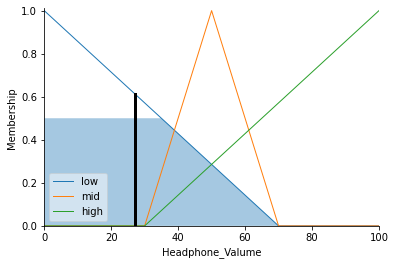

In [11]:
# simulation 4
simulate(around_sound=60, Expected_sound=10)

input : around_sound = 70 db,Expected_sound = 55 %
output : Headphone_Valume_output = 56.28202225995095 %


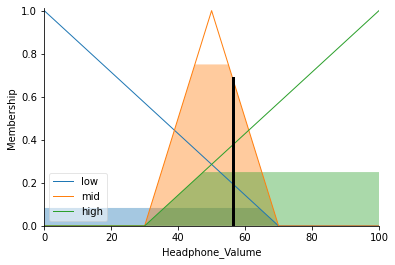

In [12]:
# simulation 5
simulate(around_sound=70, Expected_sound=55)

input : around_sound = 80 db,Expected_sound = 100 %
output : Headphone_Valume_output = 72.77777777777779 %


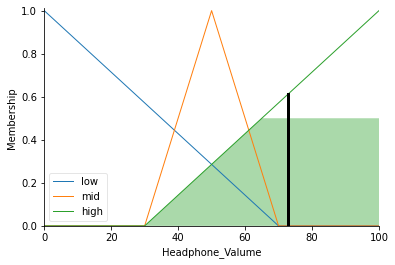

In [13]:
# simulation 6
simulate(around_sound=80, Expected_sound=100)

input : around_sound = 70 db,Expected_sound = 40 %
output : Headphone_Valume_output = 35.83939587321846 %


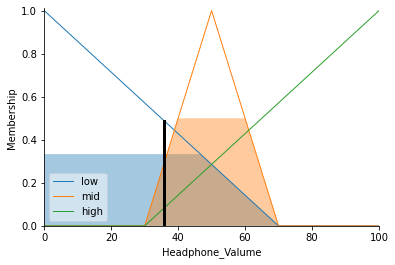

In [19]:
# simulation 7
simulate(around_sound=70, Expected_sound=40)

input : around_sound = 80 db,Expected_sound = 60 %
output : Headphone_Valume_output = 64.16060412678162 %


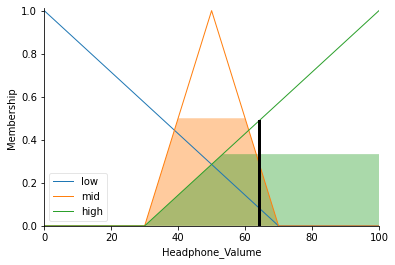

In [15]:
# simulation 8
simulate(around_sound=80, Expected_sound=60)

input : around_sound = 140 db,Expected_sound = 100 %
output : Headphone_Valume_output = 76.66666666666669 %


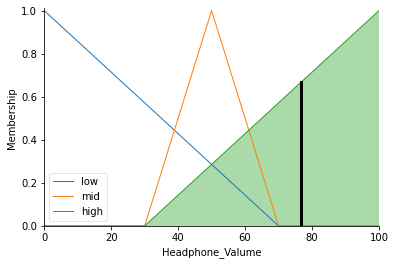

In [16]:
# simulation 9
simulate(around_sound=140, Expected_sound=100)